<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [79]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [80]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
jobs = pd.read_csv('./data/job_listings.csv')

jobs.head()              

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [81]:
jobs['description']

0      b"<div><div>Job Requirements:</div><ul><li><p>...
1      b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2      b'<div><p>As a Data Scientist you will be work...
3      b'<div class="jobsearch-JobMetadataHeader icl-...
4      b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
                             ...                        
421    b"<b>About Us:</b><br/>\nWant to be part of a ...
422    b'<div class="jobsearch-JobMetadataHeader icl-...
423    b'<div class="jobsearch-JobMetadataHeader icl-...
424    b"<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...
425    b'<div></div><div><div><div><div><p>Cerner Int...
Name: description, Length: 426, dtype: object

In [82]:
clean_text = jobs['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [83]:
clean_text[0:5]

0    b"Job Requirements:\nConceptual understanding ...
1    b'Job Description\n\nAs a Data Scientist 1, yo...
2    b'As a Data Scientist you will be working on c...
3    b'$4,969 - $6,756 a monthContractUnder the gen...
4    b'Location: USA \xe2\x80\x93 multiple location...
Name: description, dtype: object

## 2) Use Spacy to tokenize the listings 

In [84]:
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

#Tokenizer
tokenizer = Tokenizer(nlp.vocab)


def cleaning(text):
    clean = re.sub(r"[.,!?']", r"/1", text)
    clean = re.sub("[^a-zA-Z]+", r" ", text)
    clean = clean.lower()
    
    return clean

In [85]:
# a cleaner version of the text column
cleaner = clean_text.apply(cleaning)
cleaner[0]

'b job requirements nconceptual understanding in machine learning models like nai xc xa ve bayes k means svm apriori linear logistic regression neural random forests decision trees k nn along with hands on experience in at least of them nintermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role nexposure to packages like numpy scipy pandas matplotlib etc in python or ggplot dplyr tidyr in r nability to communicate model findings to both technical and non technical stake holders nhands on experience in sql hive or similar programming language nmust show past work via github kaggle or any other published article nmaster s degree in statistics mathematics computer science or any other quant specific field napply now '

In [86]:
cleaner

0      b job requirements nconceptual understanding i...
1      b job description n nas a data scientist you w...
2      b as a data scientist you will be working on c...
3      b a monthcontractunder the general supervision...
4      b location usa xe x x multiple locations n yea...
                             ...                        
421    b about us nwant to be part of a fantastic and...
422    b internshipat uber we ignite opportunity by s...
423    b a yeara million people a year die in car col...
424    b senior data scientist njob description n nab...
425    b cerner intelligence is a new innovative orga...
Name: description, Length: 426, dtype: object

In [87]:
STOP_WORDS = nlp.Defaults.stop_words.union(['b', 'k', 'nn', 'xc', 'xa', 'x', 've', 's', 'b'])

In [88]:
tokens = []

for doc in tokenizer.pipe(cleaner, batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
cleanest = tokens

In [89]:
cleanest[0]

['job',
 'requirements',
 'nconceptual',
 'understanding',
 'machine',
 'learning',
 'models',
 'like',
 'nai',
 'bayes',
 'means',
 'svm',
 'apriori',
 'linear',
 'logistic',
 'regression',
 'neural',
 'random',
 'forests',
 'decision',
 'trees',
 'hands',
 'experience',
 'nintermediate',
 'expert',
 'level',
 'coding',
 'skills',
 'python',
 'r',
 'ability',
 'write',
 'functions',
 'clean',
 'efficient',
 'data',
 'manipulation',
 'mandatory',
 'role',
 'nexposure',
 'packages',
 'like',
 'numpy',
 'scipy',
 'pandas',
 'matplotlib',
 'etc',
 'python',
 'ggplot',
 'dplyr',
 'tidyr',
 'r',
 'nability',
 'communicate',
 'model',
 'findings',
 'technical',
 'non',
 'technical',
 'stake',
 'holders',
 'nhands',
 'experience',
 'sql',
 'hive',
 'similar',
 'programming',
 'language',
 'nmust',
 'past',
 'work',
 'github',
 'kaggle',
 'published',
 'article',
 'nmaster',
 'degree',
 'statistics',
 'mathematics',
 'computer',
 'science',
 'quant',
 'specific',
 'field',
 'napply']

In [90]:
Tokenizer?

Docstring:     
Tokenizer(Vocab vocab, rules=None, prefix_search=None, suffix_search=None, infix_finditer=None, token_match=None)
Segment text, and create Doc objects with the discovered segment
    boundaries.

    DOCS: https://spacy.io/api/tokenizer
    
Init docstring:
Create a `Tokenizer`, to create `Doc` objects given unicode text.

vocab (Vocab): A storage container for lexical types.
rules (dict): Exceptions and special-cases for the tokenizer.
prefix_search (callable): A function matching the signature of
    `re.compile(string).search` to match prefixes.
suffix_search (callable): A function matching the signature of
    `re.compile(string).search` to match suffixes.
`infix_finditer` (callable): A function matching the signature of
    `re.compile(string).finditer` to find infixes.
token_match (callable): A boolean function matching strings to be
    recognised as tokens.
RETURNS (Tokenizer): The newly constructed object.

EXAMPLE:
    >>> tokenizer = Tokenizer(nlp.vocab)
    

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [91]:
##### Your Code Here #####
#adding to the stop words 
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(['b', 'k', 'nn', 'xc', 'xa', 'x', 've', 's', 'b', 'xe'])

vect = CountVectorizer(stop_words=stop_words, max_features=1000)

#Learn our Vocab
vect.fit(cleaner)

# Get sparse dtm
dtm = vect.transform(cleaner)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [92]:
dtm

,abilities,ability,able,academic,access,accommodation,accommodations,accuracy,achieve,acquisition,...,writing,written,www,xae,xb,xbb,xef,year,years,york
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,2,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,3,1
422,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
424,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4) Visualize the most common word counts

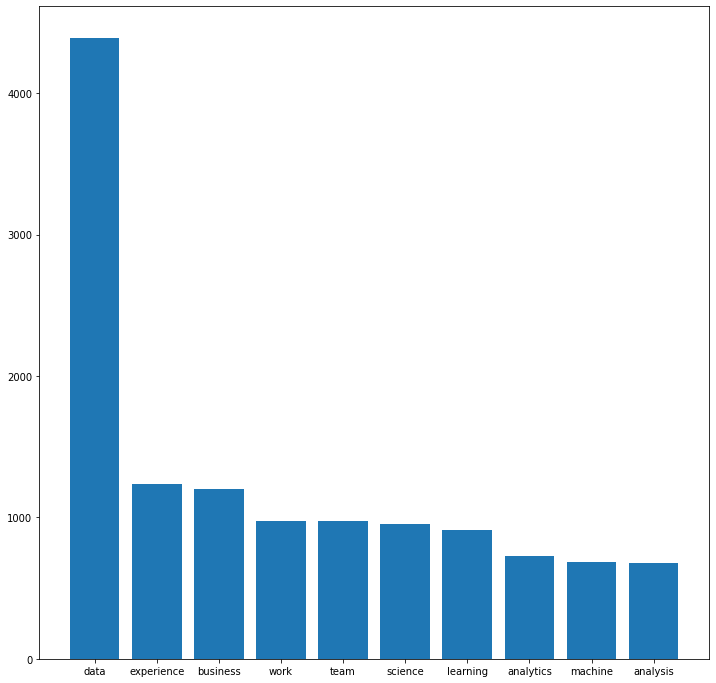

In [93]:
##### Your Code Here #####
viz = dtm.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,12))
plt.bar(viz.index, viz)
plt.show()

In [94]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

NameError: name 'squarify' is not defined

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
#tfidf = TfidfVectorizer(max_features=1000) to compare to above

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(cleaner)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()               

In [ ]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [ ]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,1),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(cleaner) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

In [ ]:
cleaner[17]

In [ ]:
ideal = ["""
We are looking to hire a data scientist here in denver austin or philadelphia the position has the option to be remote
proficiency in python sql machine learning datasets mongodb docker postgressql pandas python important natural language processing 
flexible schedule great benefits and insurance paid vacation family leave
"""]

In [ ]:
# finding similar results to my ideal job
new = tfidf.transform(ideal)

In [ ]:
nn.kneighbors(new.todense())

In [ ]:
cleaner[17]

In [ ]:
cleaner[325]

In [ ]:
cleaner[254]

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 